# Lab 2 - Vision por computadora

## 1. Explicar Hit or Miss

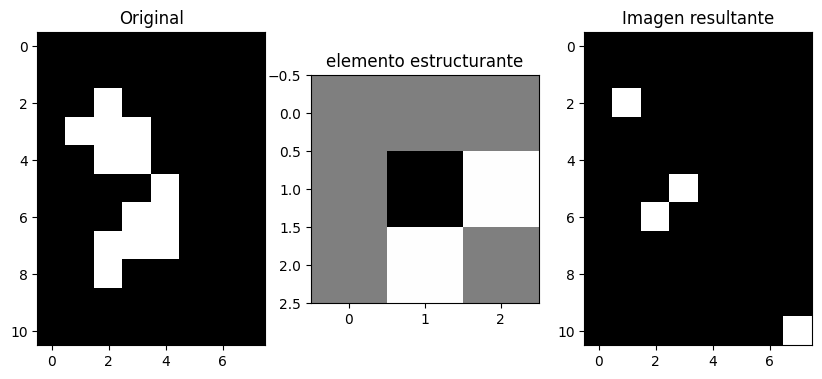

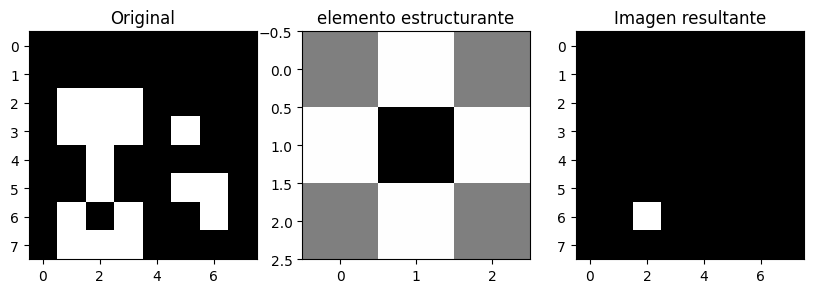

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im1 = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],), dtype="uint8")

im1 = im1*255

S = np.array((
        [0, 0, 0],
        [0, -1, 1],
        [0 ,1, 0]), dtype="int")


 
im1s = cv.morphologyEx(im1, cv.MORPH_HITMISS, S)
 

S = (S + 1) * 127
S = np.uint8(S)



plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(im1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.title("elemento estructurante")
plt.imshow(S, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.title("Imagen resultante")
plt.imshow(im1s, cmap='gray', vmin=0, vmax=255)
plt.show()

im2 = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")
 
S = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")
 
im2s = cv.morphologyEx(im2, cv.MORPH_HITMISS, S)
 
rate = 50
S = (S + 1) * 127
S = np.uint8(S)



plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(im2, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.title("elemento estructurante")
plt.imshow(S, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.title("Imagen resultante")
plt.imshow(im2s, cmap='gray', vmin=0, vmax=255)
plt.show()



## 2. Trabajar con rice.jpg

In [2]:
from skimage.filters.thresholding import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage.measure import label, regionprops
from PIL import Image
import cv2 as cv

 a) Binarizar la imagen mediante el método de Otsu, o usando algún otro método no local.

131


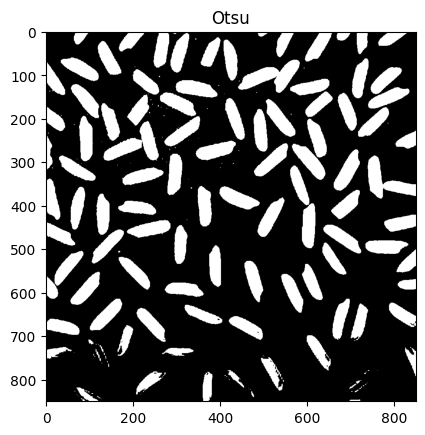

In [3]:
# Lectura imagen
rice = plt.imread('photos/rice.jpg')
rice = ski.color.rgb2gray(rice[:,:,:3])
# Conversion imagen 8
rice = (rice * 255).astype(np.uint8)
# Obtencion del threshold de Otsu
otsuTh = threshold_otsu(rice, 255)
print(otsuTh)
# Binarización de la imagen mediante Otsu
riceWithTh = 255 * ( rice >= otsuTh ).astype(np.uint8)
# Display de la imagen binarizada
plt.title("Otsu")
plt.imshow(riceWithTh, cmap='gray', vmin=0, vmax=255)
plt.show()

 b) Aplicar operaciones morfológicas adecuadas para limpiar el ruido de la binarización. Explicar porqué está eligiendo estas transformaciones morfológicas.

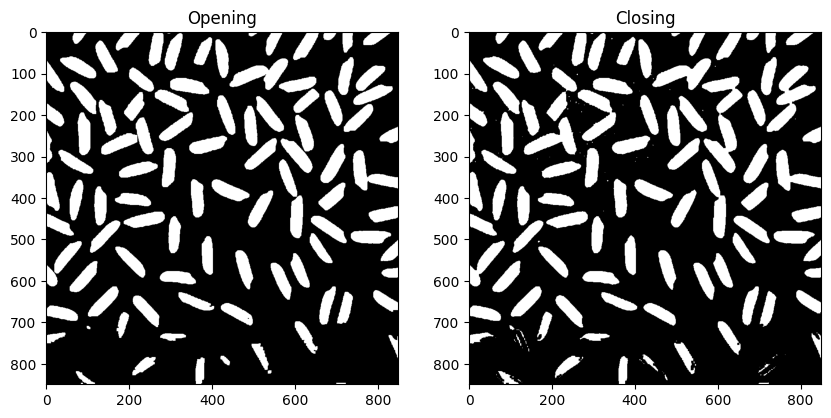

In [4]:
kernel = np.ones((5, 5), np.uint8)
riceOpening = cv.morphologyEx(riceWithTh, cv.MORPH_OPEN, kernel)
riceClosing = cv.morphologyEx(riceWithTh, cv.MORPH_CLOSE, kernel)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Opening")
plt.imshow(riceOpening, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Closing")
plt.imshow(riceClosing, cmap='gray', vmin=0, vmax=255)
plt.show()

Se aplica un opening porque primero se necesita erosionar para que se elimine el ruido provocado por el threshold de Otsu, de manera que se elimina ese set de puntos que aparece, así mismo, se aplica la dilatación para que los arroces que quedaron se agranden y que sean más claros. Sin embargo, al comparar con closing se puede observar que en el caso del closing mantiene el espectro de todos los arroces aunque puede que cuente demás ya que hay arroces que se dividen mientras que el opening no.

c) Aplicar un algoritmo de componentes conexas sobre la binarización y contar cuántos granos de arroz hay en la imagen.

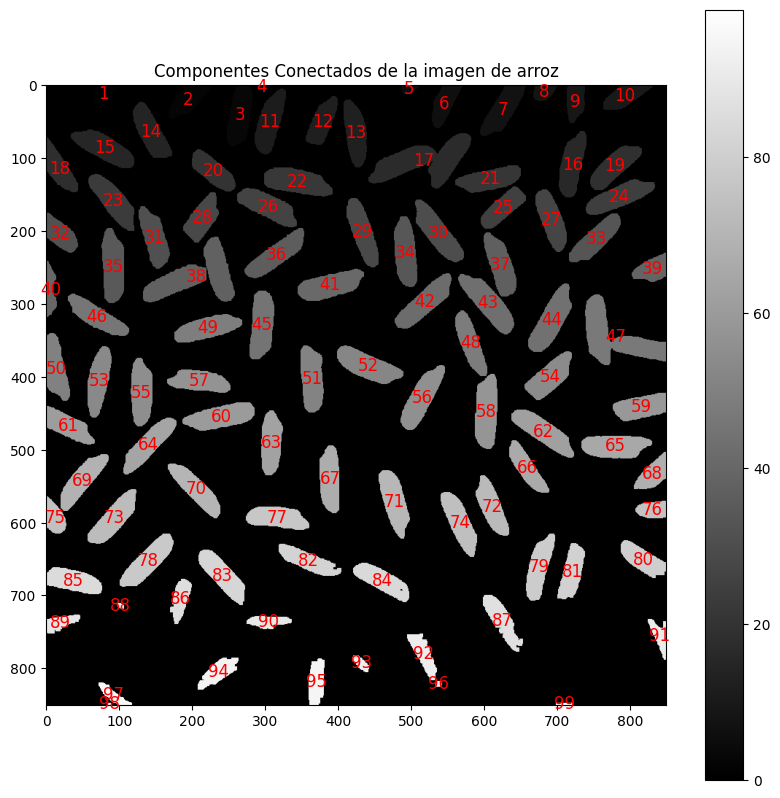

Cantidad de arroces:  99


In [5]:
# Obtener los objetos con una conectividad de 2
labels = label(riceOpening, connectivity=2)
# Obtener las regiones de los objetos
regions = regionprops(labels)
# Visualizar los componentes
plt.figure(figsize=(10, 10))
plt.title("Componentes Conectados de la imagen de arroz")
plt.imshow(labels, cmap='gray')
# Poner las labels en el mapa
for region in regions:
    centroid = region.centroid
    label_num = region.label
    plt.text(centroid[1], centroid[0], str(label_num), color='red', fontsize=12, ha='center', va='center')
plt.colorbar()
plt.show()
print("Cantidad de arroces: ", len(regions))

In [6]:
for region in regions:
    print(f"Label: {region.label}, Area: {region.area}, Centroid: {region.centroid}")

Label: 1, Area: 704.0, Centroid: (np.float64(12.436079545454545), np.float64(77.83948863636364))
Label: 2, Area: 1504.0, Centroid: (np.float64(20.12965425531915), np.float64(194.2220744680851))
Label: 3, Area: 2187.0, Centroid: (np.float64(40.924096936442616), np.float64(265.0676726108825))
Label: 4, Area: 61.0, Centroid: (np.float64(2.1475409836065573), np.float64(295.40983606557376))
Label: 5, Area: 226.0, Centroid: (np.float64(4.853982300884955), np.float64(497.2654867256637))
Label: 6, Area: 1392.0, Centroid: (np.float64(25.311063218390803), np.float64(545.7406609195402))
Label: 7, Area: 2174.0, Centroid: (np.float64(33.12603495860166), np.float64(625.7589696412143))
Label: 8, Area: 558.0, Centroid: (np.float64(9.21505376344086), np.float64(681.915770609319))
Label: 9, Area: 1088.0, Centroid: (np.float64(22.264705882352942), np.float64(725.2876838235294))
Label: 10, Area: 1370.0, Centroid: (np.float64(15.051824817518249), np.float64(793.0029197080293))
Label: 11, Area: 2297.0, Cent

# 3 Ejemplo de operaciones morfológicas 

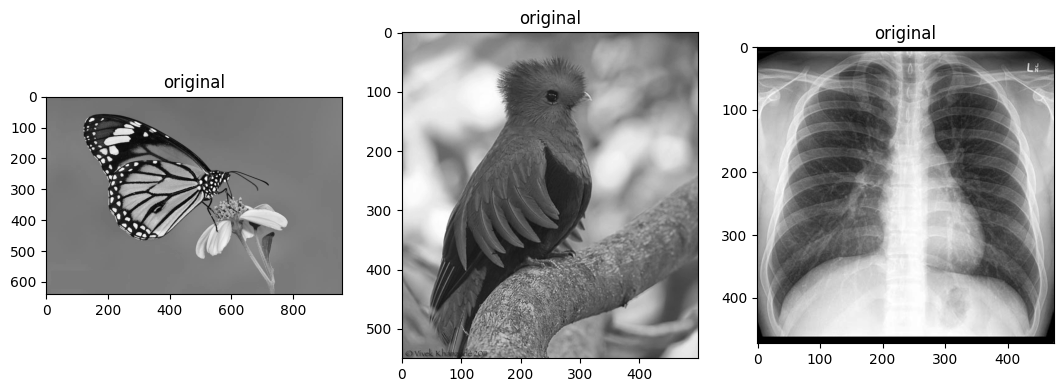

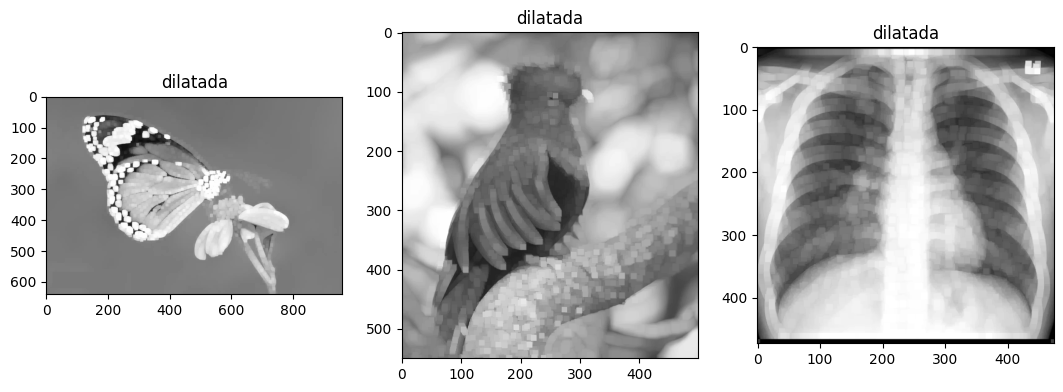

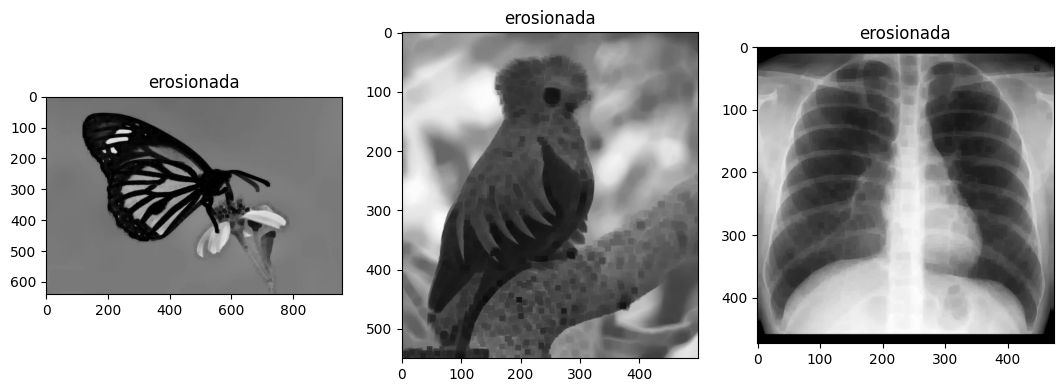

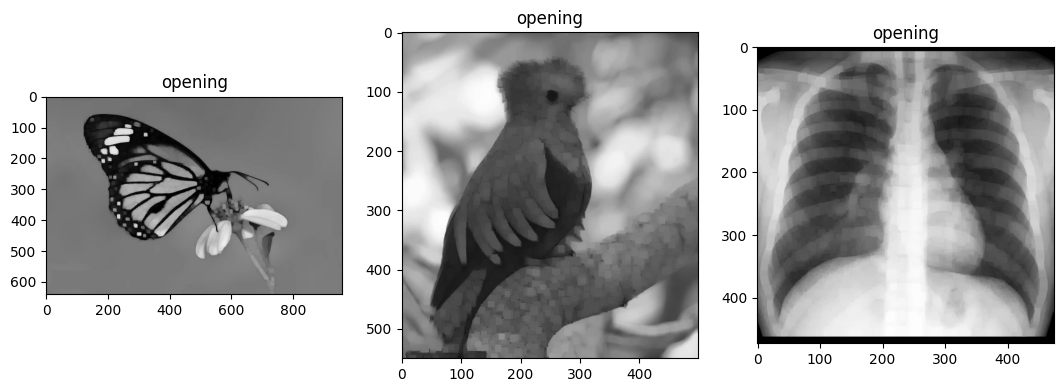

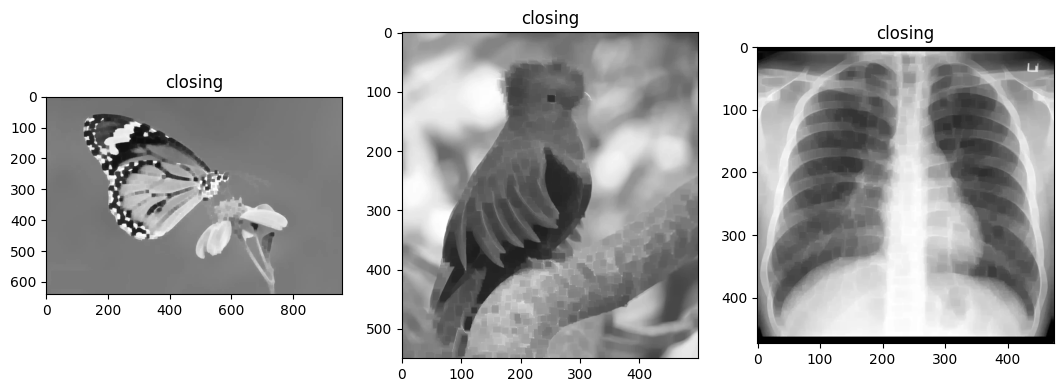

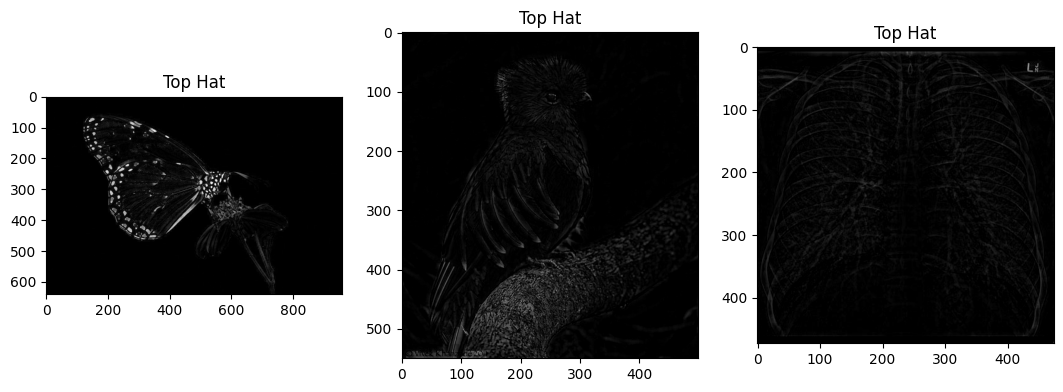

In [7]:
I_dir = ['photos/butterfly.jpeg', 'photos/quetzalgris.png', 'photos/chestxray.jpeg']
I = [plt.imread(i) for i in I_dir ]
I = [ (ski.color.rgb2gray(I[i][:,:,:3])* 255).astype(np.uint8) for i in range(3) ]


S = cv.getStructuringElement(cv.MORPH_RECT,(9,9))

# Dilatación
Idil = [cv.dilate(I[i],S) for i in range(len(I))]

Ier = [cv.erode(I[i],S) for i in range(len(I))]

Iop = [cv.morphologyEx(I[i],cv.MORPH_OPEN,S) for i in range(len(I))]

Iclo = [cv.morphologyEx(I[i],cv.MORPH_CLOSE,S) for i in range(len(I))]
Itophat = [cv.morphologyEx(I[i],cv.MORPH_TOPHAT,S) for i in range(len(I))]
Ii = [I,Idil,Ier, Iop,Iclo, Itophat]
Titulos = ['original', 'dilatada','erosionada','opening','closing','Top Hat']
for j in range(len(Titulos)):
    plt.figure(figsize=(13,13))                                  
    for i in range(len(Ii[j])):
        plt.subplot(1,len(Ii[j]),i+1)
        plt.title(Titulos[j])
        plt.imshow(Ii[j][i],cmap='gray', vmin=0, vmax=255)
    plt.show()


# 4. Gradiente morfológico

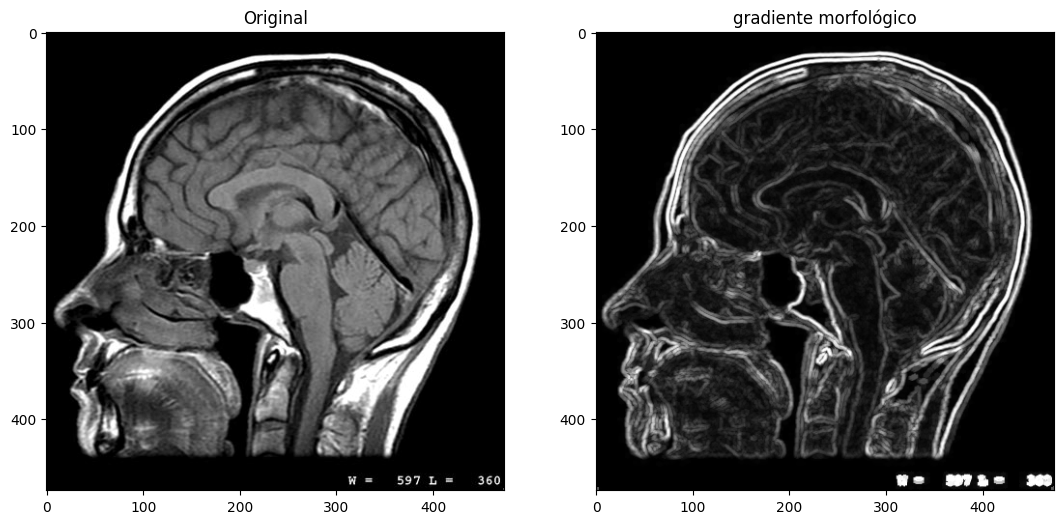

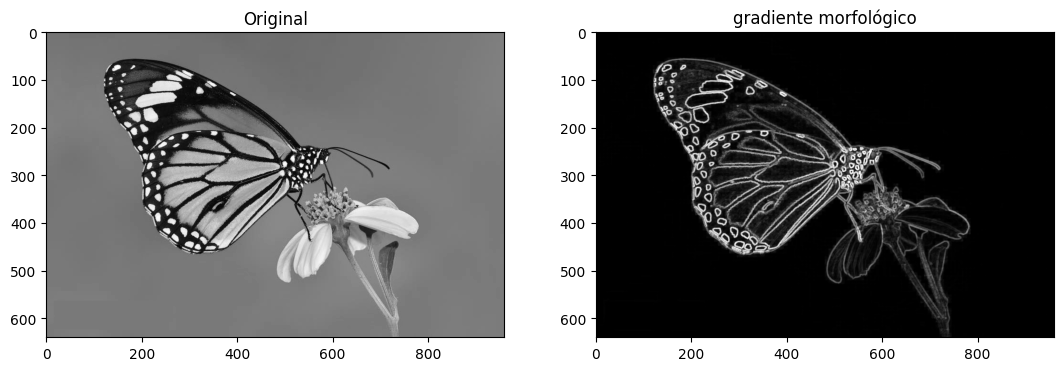

In [8]:
S = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
I = plt.imread('photos/brain-scan.jpeg')
I = (ski.color.rgb2gray(I)*255).astype(np.uint8)
DI = cv.morphologyEx(I,cv.MORPH_GRADIENT,S)
plt.figure(figsize=(13,13))                                  
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(I,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title('gradiente morfológico')
plt.imshow(DI,cmap='gray', vmin=0, vmax=255)
plt.show()

S = cv.getStructuringElement(cv.MORPH_ELLIPSE,(4,4))
I = plt.imread('photos/butterfly.jpeg')
I = (ski.color.rgb2gray(I)*255).astype(np.uint8)
DI = cv.morphologyEx(I,cv.MORPH_GRADIENT,S)
plt.figure(figsize=(13,13))                                  
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(I,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title('gradiente morfológico')
plt.imshow(DI,cmap='gray', vmin=0, vmax=255)
plt.show()



## 5. Trabajar con microscope.png

a. Binarizar la imagen (si no está binarizada).

131


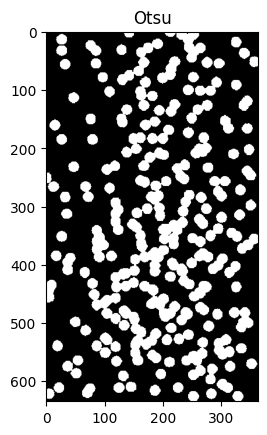

In [9]:
# Lectura imagen
microscope = plt.imread('photos/microscope.png')
microscope = ski.color.rgb2gray(microscope[:,:,:3])
# Conversion imagen 8
microscope = (microscope * 255).astype(np.uint8)
# Obtencion del threshold de Otsu
otsuTh = threshold_otsu(rice, 255)
print(otsuTh)
# Binarización de la imagen mediante Otsu
microscopeWithTh = 255 * ( microscope >= otsuTh ).astype(np.uint8)
# Display de la imagen binarizada
plt.title("Otsu")
plt.imshow(microscopeWithTh, cmap='gray', vmin=0, vmax=255)
plt.show()

b. Obtener la componente conexa de menor tamaño. ¿Cuántos píxeles tiene?

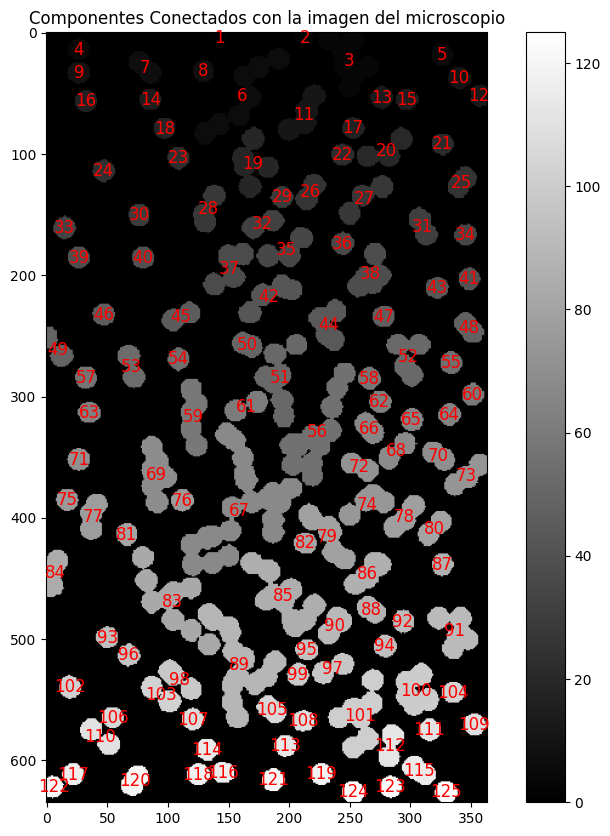

Cantidad de componentes:  125


In [10]:
# Obtener los objetos con una conectividad de 2
labels = label(microscopeWithTh, connectivity=2)
# Obtener las regiones de los objetos
regions = regionprops(labels)
# Visualizar los componentes
plt.figure(figsize=(10, 10))
plt.title("Componentes Conectados con la imagen del microscopio")
plt.imshow(labels, cmap='gray')
for region in regions:
    centroid = region.centroid
    label_num = region.label
    plt.text(centroid[1], centroid[0], str(label_num), color='red', fontsize=12, ha='center', va='center')
plt.colorbar()
plt.show()
print("Cantidad de componentes: ", len(regions))

In [11]:
areas = [region.area for region in regions]
minimumArea = min(areas)
smallestComponent = areas.index(minimumArea)
print(f"La componente de menor tamaño es {regions[smallestComponent].label} y tiene {minimumArea} pixeles")

La componente de menor tamaño es 2 y tiene 158.0 pixeles


c. Recortar la componente conexa de mayor tamaño, y remover el resto de componentes. Mostrar una imagen binaria
donde solo quede la mayor componente conexa.

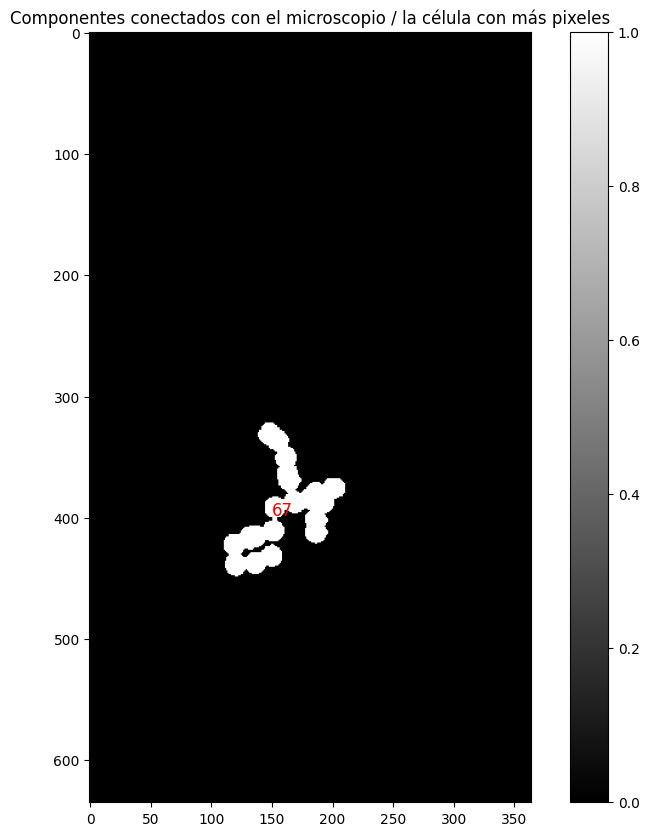

La componente de menor tamaño es 67 y tiene 4173.0 pixeles


In [12]:
biggestArea = max(areas)
biggestComponent = areas.index(biggestArea)
# Crear una máscara binaria que contenga solo el componente más grande
biggestComponentMask = (labels == regions[biggestComponent].label)
plt.figure(figsize=(10, 10))
plt.title("Componentes conectados con el microscopio / la célula con más pixeles")
plt.imshow(biggestComponentMask, cmap='gray')
centroid = regions[biggestComponent].centroid
label_num = regions[biggestComponent].label
plt.text(centroid[1], centroid[0], str(label_num), color='red', fontsize=12, ha='center', va='center')
plt.colorbar()
plt.show()
print(f"La componente de menor tamaño es {regions[biggestComponent].label} y tiene {biggestArea} pixeles")

d. Aplicar operaciones morfológicas para contar cuántas células hay en total. ¿Comparar el número obtenido contra el
número verdadero de células? ¿Son iguales?

In [13]:
kernel = np.ones((5, 5), np.uint8)
microscopeErosion = cv.erode(microscopeWithTh, kernel)
microscopeOpening = cv.morphologyEx(microscopeWithTh, cv.MORPH_OPEN, kernel)
microscopeClosing = cv.morphologyEx(microscopeWithTh, cv.MORPH_CLOSE, kernel)
# Regiones y labels en erosion
labels0 = label(microscopeErosion, connectivity=2)
regions0 = regionprops(labels0)
# Regiones y labels en opening
labels1 = label(microscopeOpening, connectivity=2)
regions1 = regionprops(labels1)
# Regiones y labels en closing
labels2 = label(microscopeClosing, connectivity=2)
regions2 = regionprops(labels2)

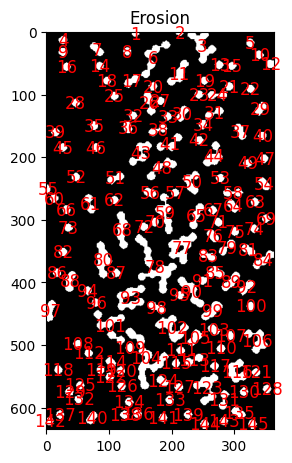

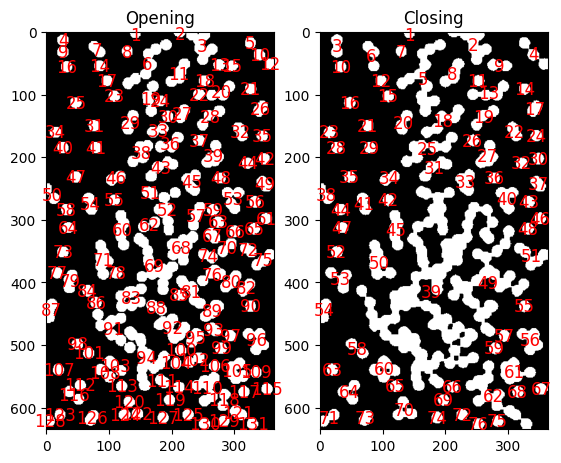

Cantidad de componentes según erosión:  145
Cantidad de componentes según opening:  131
Cantidad de componentes según closing:  76


In [14]:
# Graficar Erosion
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Erosion")
plt.imshow(microscopeErosion, cmap='gray', vmin=0, vmax=255)
for region in regions0:
    centroid = region.centroid
    label_num = region.label
    plt.text(centroid[1], centroid[0], str(label_num), color='red', fontsize=12, ha='center', va='center')
# Graficar opening
plt.figure(figsize=(10,10))
plt.subplot(1,3,2)
plt.title("Opening")
plt.imshow(microscopeOpening, cmap='gray', vmin=0, vmax=255)
for region in regions1:
    centroid = region.centroid
    label_num = region.label
    plt.text(centroid[1], centroid[0], str(label_num), color='red', fontsize=12, ha='center', va='center')
# Graficar closing
plt.subplot(1,3,3)
plt.title("Closing")
plt.imshow(microscopeClosing, cmap='gray', vmin=0, vmax=255)
for region in regions2:
    centroid = region.centroid
    label_num = region.label
    plt.text(centroid[1], centroid[0], str(label_num), color='red', fontsize=12, ha='center', va='center')
plt.show()
print("Cantidad de componentes según erosión: ", len(regions0))
print("Cantidad de componentes según opening: ", len(regions1))
print("Cantidad de componentes según closing: ", len(regions2))

Erosión, el número de células aumenta 145 vs 125.

Opening, el número de células aumenta, de manera que son 131 contra los 125 que son en la imagen original

Closing, el número de células disminuye, de manera que son 76 contra los 125 que son en la imagen original

De manera que aplicando diversas operaciones morfológicas se obtiene que la cantidad de células varía dependiendo de qué operación se esté aplicando.

## 6. Trabajar con wheat.jpg

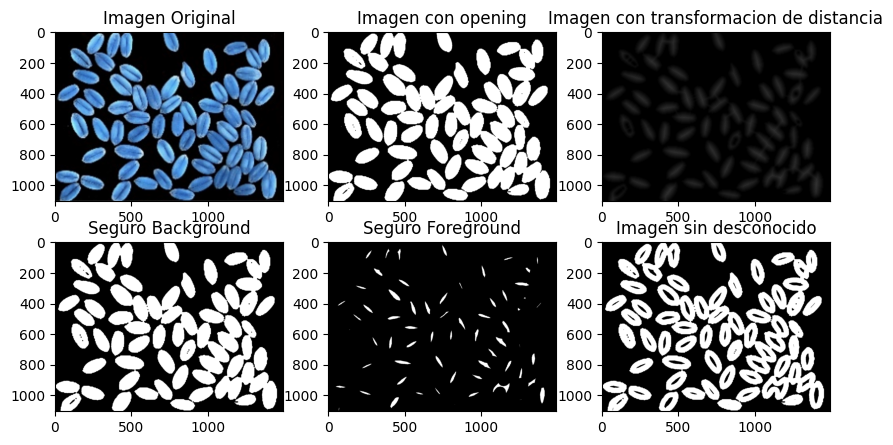

In [15]:
wheat = cv.imread('photos/wheat.png')
ret, thresh = cv.threshold(cv.cvtColor(wheat,cv.COLOR_BGR2GRAY),0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

kernel = np.ones((2,2),np.uint8) # crear kernel
wheatOp = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2) # disminuir con opening y que sean más separados
wheatOp = cv.bitwise_not(wheatOp) # Para que los granos queden como blancos [target]
 
# sure background area
sure_bg = cv.erode(wheatOp,kernel,iterations=2)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(wheatOp,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

plt.figure(figsize=(10, 10))
plt.subplot(2,3,1)
plt.title("Imagen Original")
plt.imshow(wheat)
plt.subplot(2,3,2)
plt.title("Imagen con opening")
plt.imshow(wheatOp, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,3,3)
plt.title("Imagen con transformacion de distancia")
plt.imshow(dist_transform, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,1)
plt.title("Seguro Background")
plt.imshow(sure_bg, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.title("Seguro Foreground")
plt.imshow(sure_fg, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.title("Imagen sin desconocido")
plt.imshow(unknown, cmap='gray', vmin=0, vmax=255)
plt.show()

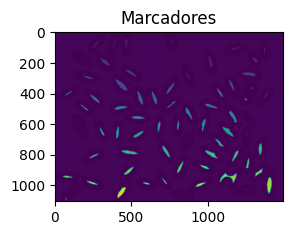

In [16]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.figure(figsize=(10, 10))
plt.subplot(2,3,1)
plt.title("Marcadores")
plt.imshow(markers)

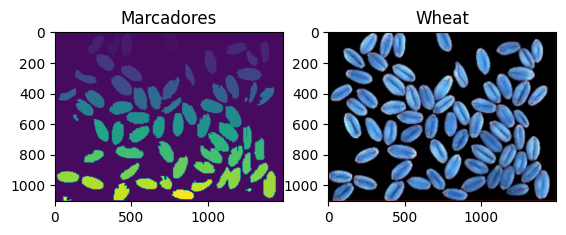

In [17]:
markers = cv.watershed(wheat,markers)
wheat[markers == -1] = [255,0,0]
plt.figure(figsize=(10, 10))
plt.subplot(2,3,1)
plt.title("Marcadores")
plt.imshow(markers)
plt.subplot(2,3,2)
plt.title("Wheat")
plt.imshow(wheat)

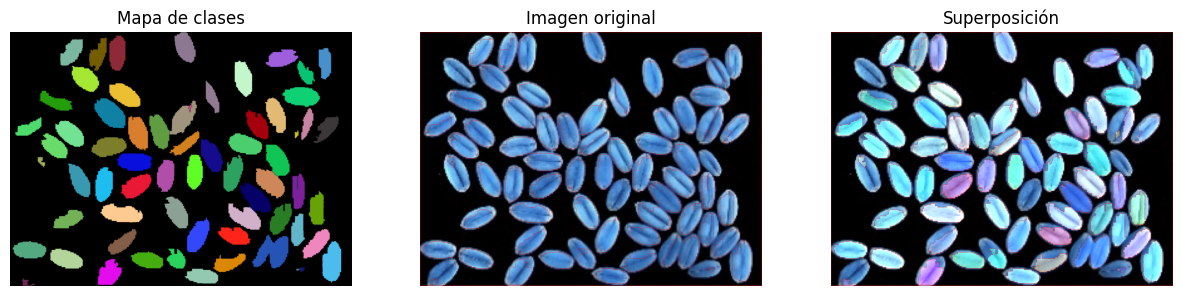

In [18]:
# Crear mapa de clases con fondo negro y cada grano en un color distinto
class_map = np.zeros((markers.shape[0], markers.shape[1], 3), dtype=np.uint8)

# Generar colores aleatorios para cada grano
colors = np.random.randint(0, 255, (np.max(markers) + 1, 3), dtype=np.uint8)

for i in range(2, np.max(markers) + 1):  # Evitar el fondo y bordes
    class_map[markers == i] = colors[i]

# Convertir a RGB para visualización
class_map_rgb = cv.cvtColor(class_map, cv.COLOR_BGR2RGB)

# Crear versión tenue del mapa de colores (ajustar canal alfa)
alpha = 0.5  # Opacidad del mapa de clases
overlay = cv.addWeighted(wheat, 1, class_map_rgb, alpha, 0)

# Visualizar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Mapa de clases")
plt.imshow(class_map_rgb)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Imagen original")
plt.imshow(wheat)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Superposición")
plt.imshow(overlay)
plt.axis("off")

plt.show()